In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_dd = pd.read_csv('/home/phiofs/Documentos/GitHub/ms-dscience/data/flights.csv')
df_dd.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


## Depuracion de la df

In [6]:
# Analisis de dimension
df_dd.shape

(271940, 20)

In [11]:
# Revisa si hay algun valor nulo en cada columna
for i in df_dd.columns:
    if any(df_dd[i].isnull()):
        print(f"Existe algun valor nulo en la columna {i}")

Existe algun valor nulo en la columna DepDel15


In [16]:
# Revisa cuantos valores nulos hay en depdelay15
df_dd.DepDel15[df_dd.DepDel15.isnull()].shape

(2761,)

In [17]:
df_dd[df_dd.DepDel15.isnull()].head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
171,2013,4,18,4,DL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,13930,Chicago O'Hare International,Chicago,IL,835,0,NaN,945,0,1,1
359,2013,5,22,3,OO,11433,Detroit Metro Wayne County,Detroit,MI,13930,Chicago O'Hare International,Chicago,IL,1719,0,NaN,1738,0,1,1
429,2013,7,3,3,MQ,13851,Will Rogers World,Oklahoma City,OK,13930,Chicago O'Hare International,Chicago,IL,1935,0,NaN,2125,0,1,1
545,2013,4,13,6,FL,14524,Richmond International,Richmond,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,630,0,NaN,809,0,1,1
554,2013,5,8,3,EV,12953,LaGuardia,New York,NY,11193,Cincinnati/Northern Kentucky International,Cincinnati,OH,1320,0,NaN,1524,0,1,1


- Como **DepDel15** esta relacionada con DepDelay se realiza la hipotesis de que no hay valor en DepDel15 porque DepDelay es 0.0

In [21]:
df_dd.DepDelay.describe()

count    271940.000000
mean         10.350449
std          35.673710
min         -63.000000
25%          -4.000000
50%          -1.000000
75%           9.000000
max        1425.000000
Name: DepDelay, dtype: float64

In [24]:
df_dd[df_dd.DepDelay <= 0].head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0
6,2013,10,6,7,WN,13796,Metropolitan Oakland International,Oakland,CA,12191,William P Hobby,Houston,TX,630,-1,0.0,1210,-3,0,0
14,2013,10,20,7,AS,14107,Phoenix Sky Harbor International,Phoenix,AZ,14747,Seattle/Tacoma International,Seattle,WA,1330,-11,0.0,1628,-15,0,0
15,2013,4,14,7,AA,12892,Los Angeles International,Los Angeles,CA,13830,Kahului Airport,Kahului,HI,1730,-7,0.0,2010,26,1,0


- Se comprueba exitosamente la existencia de valores de 0 para DepDelay menores que 0, entonces podemos cambiar los valores perdidos de DepDel15 por 0

In [25]:
df_dd.DepDel15.fillna(0, inplace=True)

In [27]:
df_dd.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

### Realicemos un analisis de los valores de la columna DepDelay y ArrDelay

In [28]:
df_dd.DepDelay.describe()

count    271940.000000
mean         10.350449
std          35.673710
min         -63.000000
25%          -4.000000
50%          -1.000000
75%           9.000000
max        1425.000000
Name: DepDelay, dtype: float64

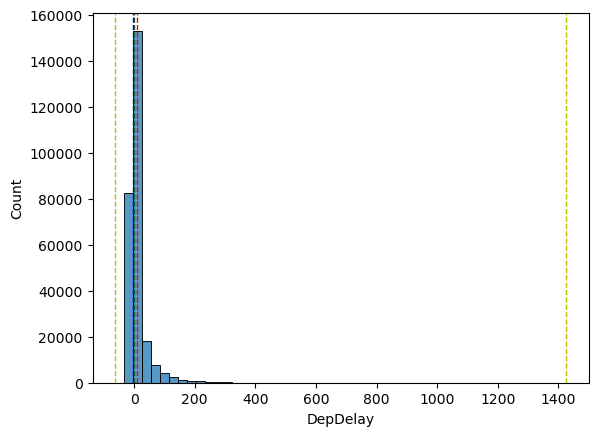

In [52]:
sns.histplot(df_dd.DepDelay, bins=50)
# colocar la media moda y mediana en el histograma
plt.axvline(df_dd.DepDelay.mean(), color='r', linestyle='dashed', linewidth=1)
plt.axvline(df_dd.DepDelay.median(), color='g', linestyle='dashed', linewidth=1)
plt.axvline(df_dd.DepDelay.mode()[0], color='b', linestyle='dashed', linewidth=1)
plt.axvline(df_dd.DepDelay.max(), color='y', linestyle='dashed', linewidth=1)
plt.axvline(df_dd.DepDelay.min(), color='y', linestyle='dashed', linewidth=1)

/home/phiofs/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DepDelay'>

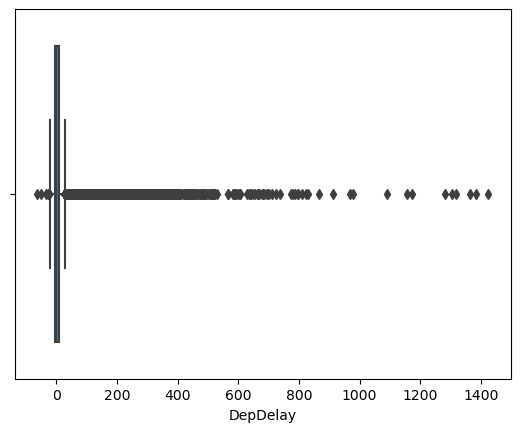

In [53]:
sns.boxplot(df_dd.DepDelay)

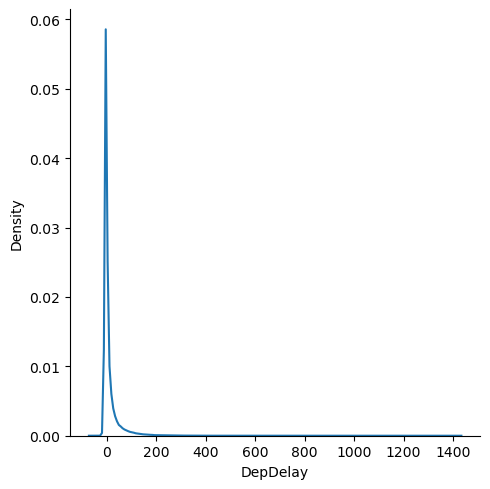

In [54]:
sns.displot(df_dd.DepDelay, kind='kde')

- Ciertamente existen valores considerados outliers dentro de la columna DepDelay

In [56]:
def removedor_outliers(df, col, k=1.5):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    filtro = (df[col] >= q1 - k*iqr) & (df[col] <= q3 + k*iqr)
    return df.loc[filtro, :]

/home/phiofs/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DepDelay'>

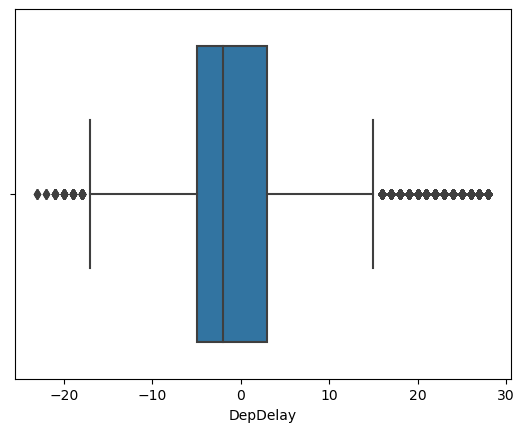

In [57]:
df_dd=removedor_outliers(df_dd, 'DepDelay', k=1.5) 

sns.boxplot(df_dd.DepDelay)

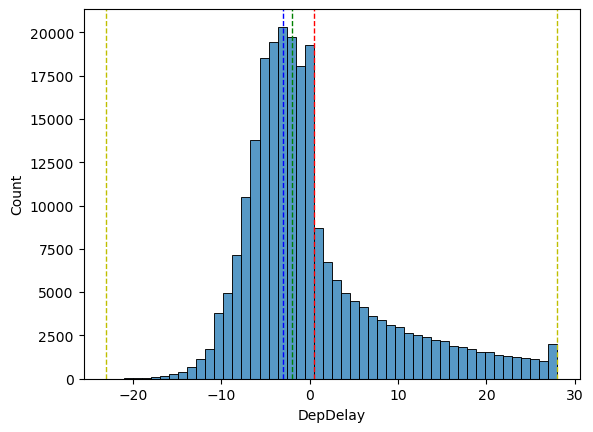

In [58]:
sns.histplot(df_dd.DepDelay, bins=50)
# colocar la media moda y mediana en el histograma
plt.axvline(df_dd.DepDelay.mean(), color='r', linestyle='dashed', linewidth=1)
plt.axvline(df_dd.DepDelay.median(), color='g', linestyle='dashed', linewidth=1)
plt.axvline(df_dd.DepDelay.mode()[0], color='b', linestyle='dashed', linewidth=1)
plt.axvline(df_dd.DepDelay.max(), color='y', linestyle='dashed', linewidth=1)
plt.axvline(df_dd.DepDelay.min(), color='y', linestyle='dashed', linewidth=1)

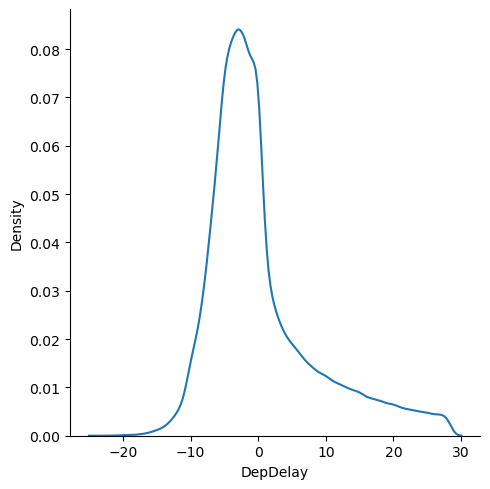

In [59]:
sns.displot(df_dd.DepDelay, kind='kde')

Debido a que tenemos que hacer esto de nuevo definire una funcion para hacerlo

In [90]:
def plot_outliers(df, col):
    fig, axs = plt.subplots(1,3, figsize = (25,5))
    sns.boxplot(df[col], ax=axs[0])
    sns.histplot(df[col], bins=50, ax=axs[1])
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode().values[0]
    max_value = df[col].max()
    min_value = df[col].min()
    axs[1].axvline(mean, color='r', linestyle='dashed', linewidth=1)
    axs[1].axvline(median, color='g', linestyle='dashed', linewidth=1)
    axs[1].axvline(mode, color='b', linestyle='dashed', linewidth=1)
    axs[1].axvline(max_value, color='y', linestyle='dashed', linewidth=1)
    axs[1].axvline(min_value, color='y', linestyle='dashed', linewidth=1)
    sns.kdeplot(df[col],ax=axs[2])
    plt.show()

/home/phiofs/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


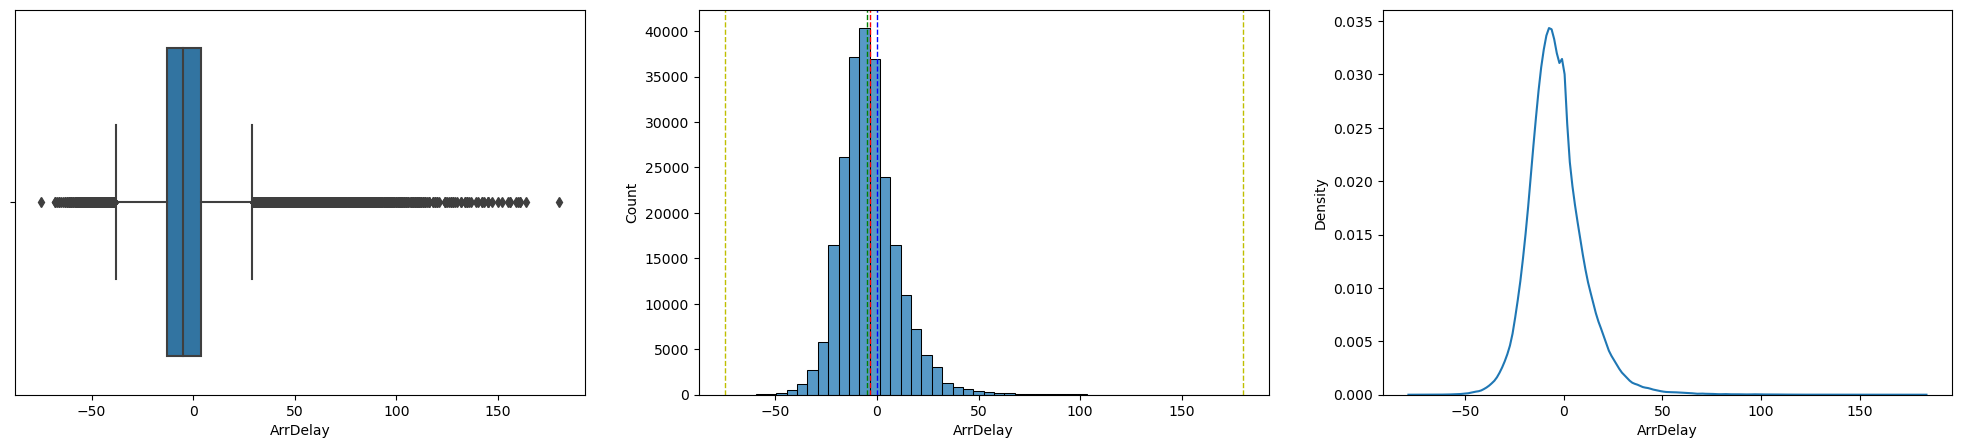

In [91]:
plot_outliers(df_dd,'ArrDelay')

/home/phiofs/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


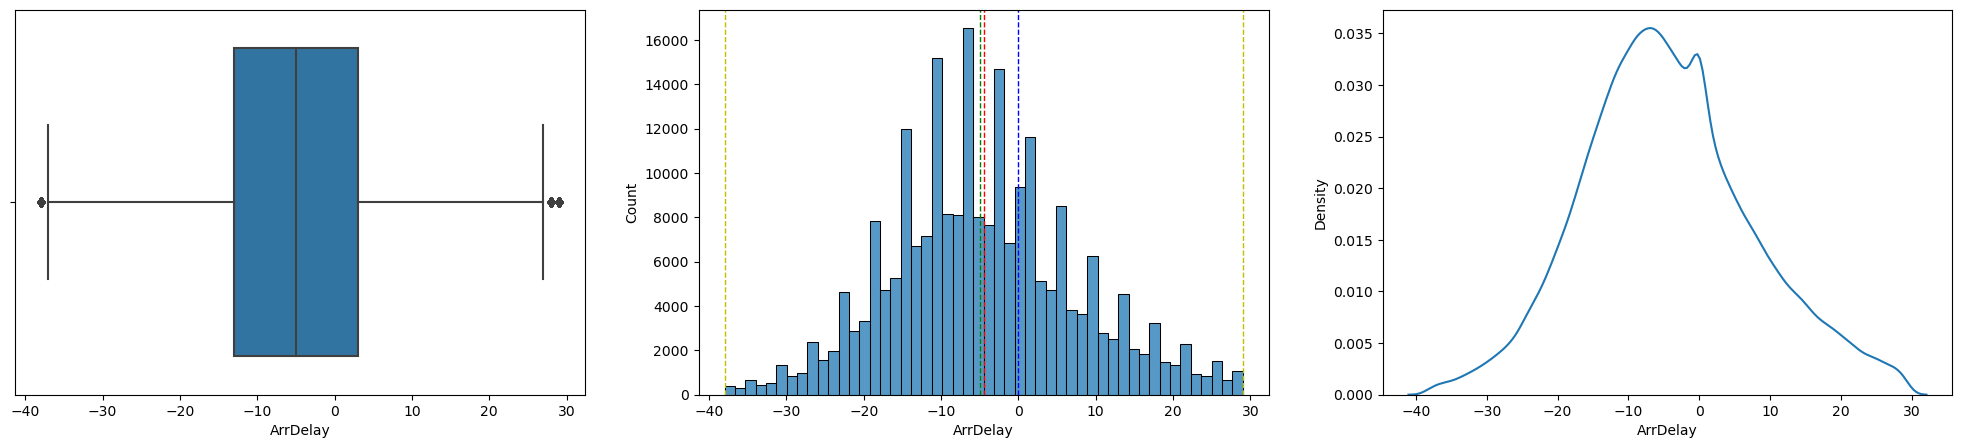

In [93]:
df_dd=removedor_outliers(df_dd, 'ArrDelay', k=1.5)
plot_outliers(df_dd,'ArrDelay')

In [94]:
# Analisis de dimension
df_dd.shape

(231247, 20)

Existe un cambio en la dimension por las celdas que fueron depuradas entonces queda completamente limpia la data. 